# Output files will be here

In [1]:
import os
output_path = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(my_PC)/\
PhD(output_files)/Engineering_projects/\
Indentation_tests/240908_2_regime_analysis_2d_GPR_all_data/240909_GPR_lmr_hmr/both"

## Loading the saved data 
We have made an outputfile containing the data and saved it in the current folder. Now we want to load this data into an array called data_with_testnames.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import WhiteKernel, RBF

file_name = "Spherical_indentation_data.xlsx"
new_path = !pwd 
new_path= new_path[0]
new_path = os.path.join(new_path,file_name)

df = pd.read_excel(file_name)
data_with_testnames = df[1:].values

There are 3 ategories. red, green, blue.
The first 13 data are in category red.
The next 13 are in category green.
The last 19 are in category blue. Lets seggregate them right away from here.

In [3]:
data_with_testnames_r = data_with_testnames[0:13,:] # from first to 13th data point.
data_with_testnames_g = data_with_testnames[13:26,:]
data_with_testnamesb = data_with_testnames[26:,:]

The above data_with_testnames is a 2d array. The columns represent the following.
- cloumn 0 : test name
- column 1 : Linear strain hardening co-efficient (K)
- column 2 : indentation yield strength, (Y,GPa)
- column 3 : shortest distance from the grain boundary (x,micro meters)
- column 4 : Misorientation angle (o,degrees)

So, lets create another variable called "data" with no test names in it.

In [4]:
# All data combined
data = data_with_testnames[:,1:]
K = data[:,0]
Y = data[:,1]
x = data[:,2]
o = data[:,3]

# Only the red data
datar = data_with_testnames_r[:,1:]
Kr = datar[:,0]
Yr = datar[:,1]
xr = datar[:,2]
or_ = datar[:,3]

# Only the green data
datag = data_with_testnames_g[:,1:]
Kg = datag[:,0]
Yg = datag[:,1]
xg = datag[:,2]
og = datag[:,3]

# Only the blue data
datab = data_with_testnamesb[:,1:]
Kb = datab[:,0]
Yb = datab[:,1]
xb = datab[:,2]
ob = datab[:,3]

The above "data" variable is a 2d array. The columns represent the following.
- column 0 : Linear strain hardening co-efficient(Y)
- column 1 : indentation yield strength, (Y,GPa)
- column 2 : shortest distance from the grain boundary (x,micro meters)
- column 3 : Misorientation angle (o,degrees)

We will develop a cleaner code from now on.
Let us present all the data in dictionary format. Doing it in object format is good, But Currently I do not possess the skill.

Let us make a dictionary of the data.

In [5]:
data_dict = {"colors":["Red","Green","Blue"],
             "names":["K","Y","x","o"],
             "shapes":["^","v",1,"o"],
            "K":[Kr,Kg,Kb],
            "Y":[Yr,Yg,Yb],
            "x":[xr,xg,xb],
            "o":[or_,og,ob]}

# Visualizing the data

In [6]:
# A function for 3d plot
def my_3d_plot(data_dict):
    for __ in range(3):   
        for _ in range(2):
            fig = plt.figure(figsize=[10,10]) 
            axs= fig.add_subplot(111,projection="3d")
            x_latex = r"$\mathbf{x}$"
            theta_latex = r"$\mathbf{\theta}$"
            _axis = rf"$\mathbf{{{data_dict['names'][_]}}}$"

            axs.set_xlabel(f"{x_latex}- axis", fontweight="bold",fontsize=12)
            axs.set_ylabel(f"{theta_latex} - axis", fontweight = "bold", fontsize=12)
            axs.set_zlabel(f"{_axis} - axis", fontweight="bold", fontsize=12)
            axs.set_title(f"Variation of {_axis}  with respect to {x_latex} and {theta_latex} for group {data_dict['colors'][__]}"
                          ,fontweight="bold",
                          fontsize=14)
            axs.tick_params(labelsize=10)
            scatter = axs.scatter(data_dict["x"][__],data_dict["o"][__],data_dict[data_dict["names"][_]][__],
                                  c= data_dict[data_dict["names"][_]][__], 
                                  marker = data_dict["shapes"][_], edgecolor="k",linewidth=2,s=100,
                                  cmap= f"{data_dict['colors'][__]}s",label= f"{data_dict['colors'][__]} data",
                                 )
            for i, (x, o, K) in enumerate(zip(data_dict["x"][__],
                                              data_dict["o"][__],
                                              data_dict[data_dict["names"][_]][__])):
                axs.text(x, o, K, f'  {i}', color=data_dict["colors"][__], fontsize=10, fontweight='bold')
            legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
            cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
            cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')
            # Saving
            file_name = f"1_data_points_3D_unscaled_{data_dict['names'][_]}_{data_dict['colors'][__]}.pdf"
            file_loc = os.path.join(output_path,file_name)
            plt.savefig(file_loc)
            

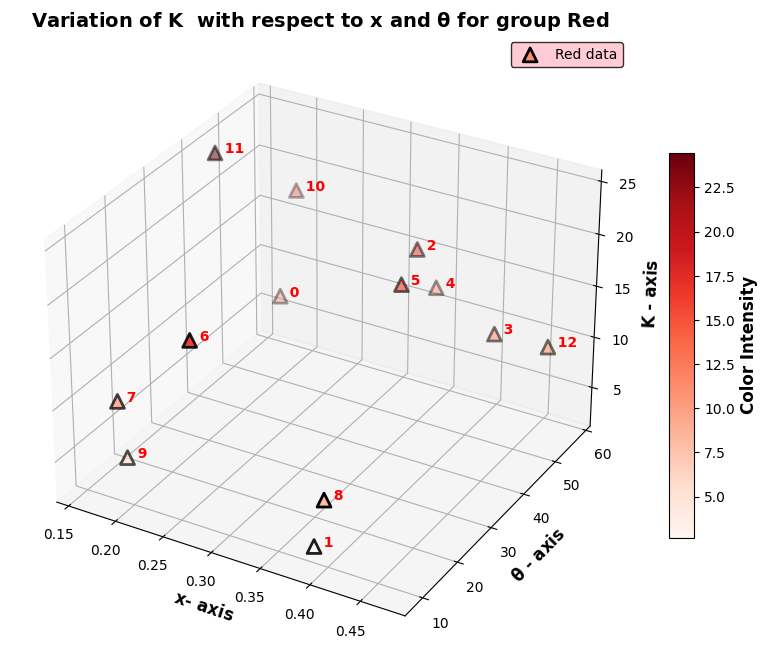

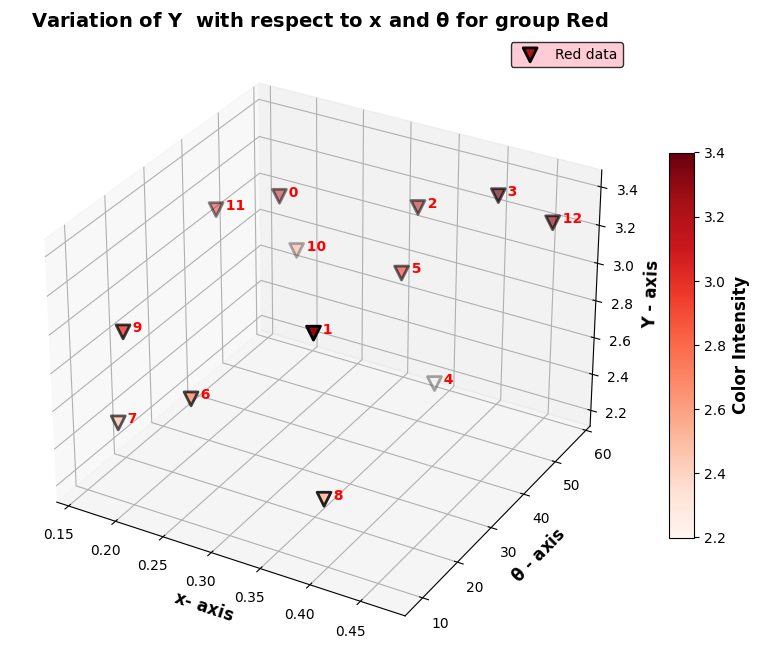

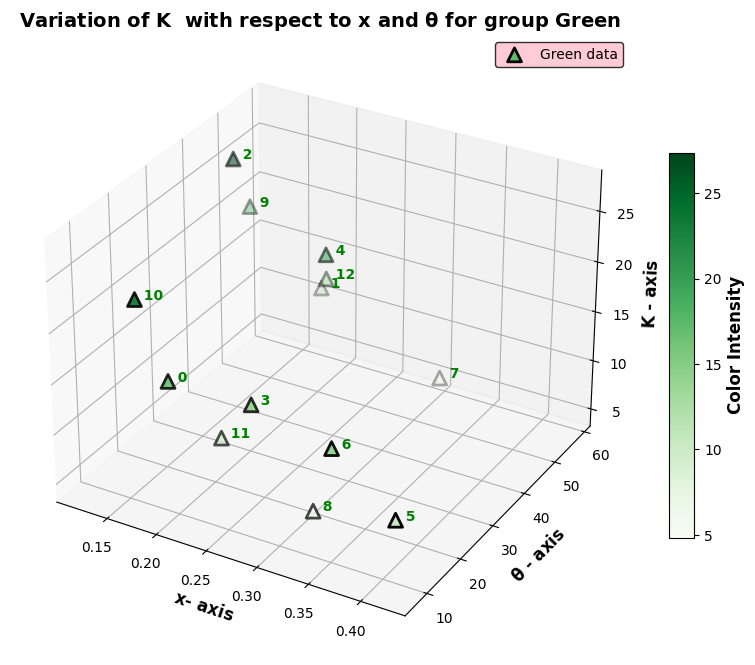

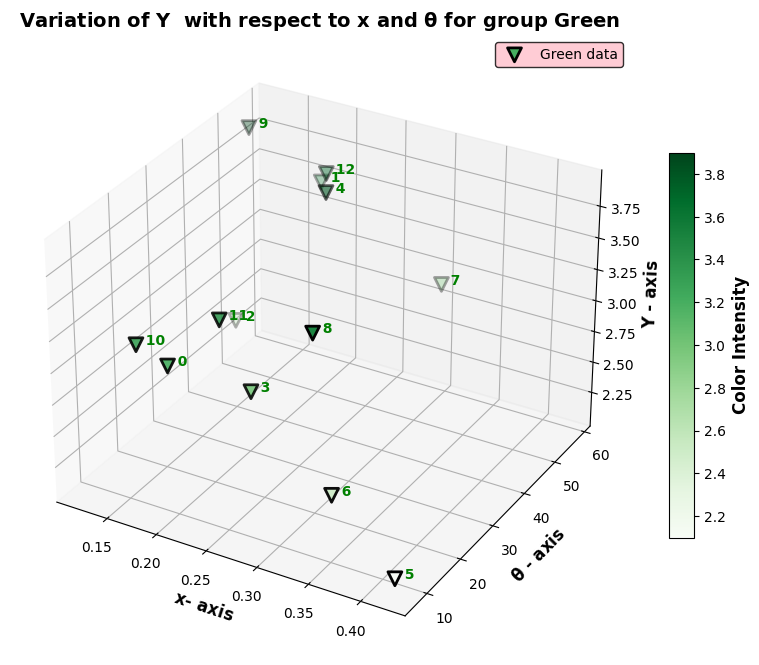

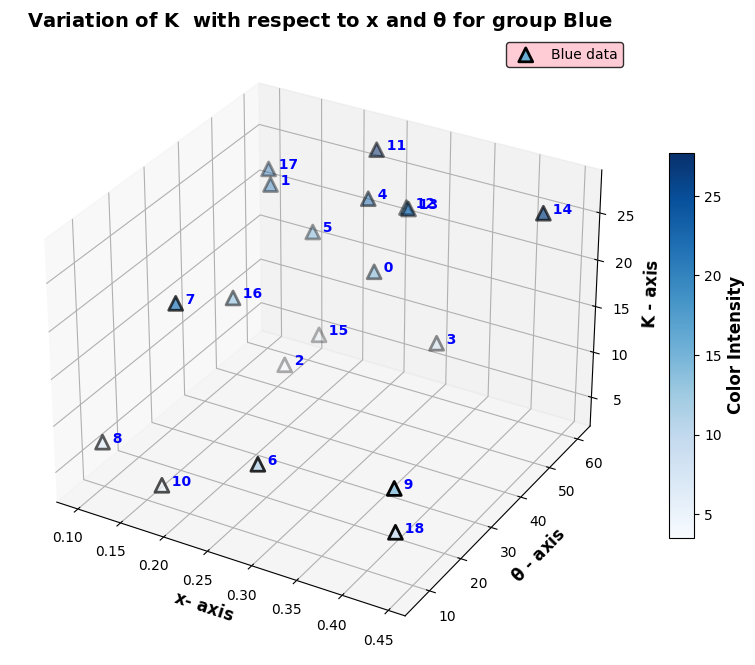

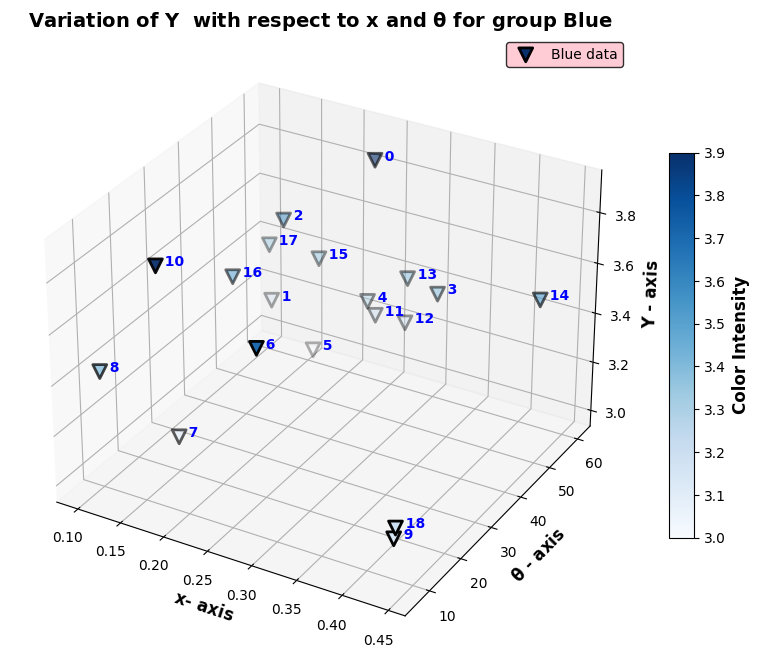

In [7]:
my_3d_plot(data_dict)

# 2D plots

In [8]:
def my_2d_plot(data_dict):
    for _ in range(3):
        for _y_ in [0,1,3]:
            for _x_ in range(2,4):
                fig,axs = plt.subplots(1,1,figsize=[5,5])
                x_latex = rf"$\mathbf{{{data_dict['names'][_x_]}}}$"
                y_latex = rf"$\mathbf{{{data_dict['names'][_y_]}}}$"
                x_name = data_dict['names'][_x_]
                y_name = data_dict['names'][_y_]
                axs.set_title(f"{y_latex} vs {x_latex}", fontweight="bold", fontsize=14)
                axs.set_xlabel(f"{x_latex} - axis", fontweight="bold", fontsize=12)
                axs.set_ylabel(f"{y_latex} - axis", fontweight="bold", fontsize=12)
                axs.scatter(data_dict[x_name][_],
                            data_dict[y_name][_],
                            c=data_dict["colors"][_],
                            marker=data_dict["shapes"][_y_], 
                            edgecolor="k",linewidth=2,s=100,)
                for i, (x, y) in enumerate(zip(data_dict[x_name][_],data_dict[y_name][_],)):
                    axs.text(x, y, f'  {i}', color= data_dict["colors"][_], fontsize=10, fontweight='bold')
                axs.set_facecolor("#f4f4f4")
                axs.grid(True, linestyle="--", alpha = 0.25)
        #axs[i].legend(loc="best",facecolor="pink", edgecolor = "black")
        
                # Saving
                file_name = f"2_data_points_2D_unscaled_{y_name}_vs_{x_name}_{data_dict['colors'][_]}.pdf"
                file_loc = os.path.join(output_path,file_name)
                plt.savefig(file_loc)
        

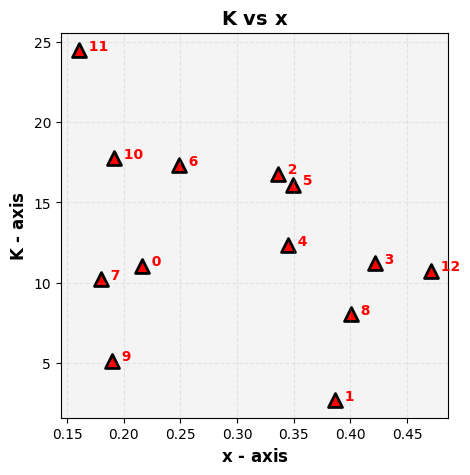

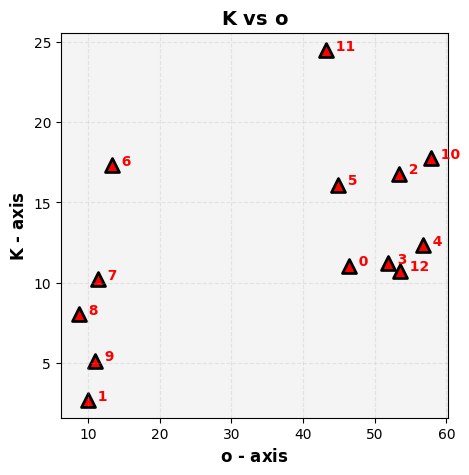

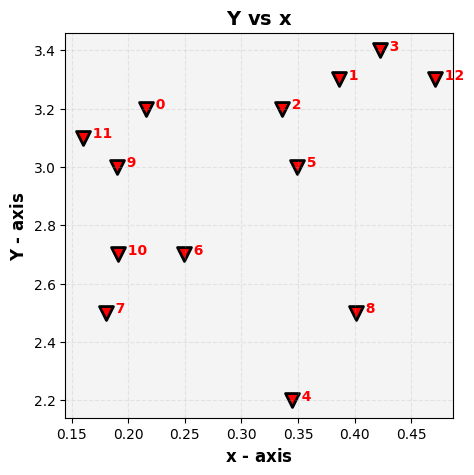

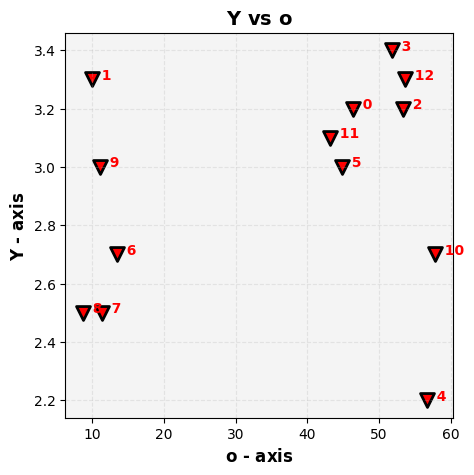

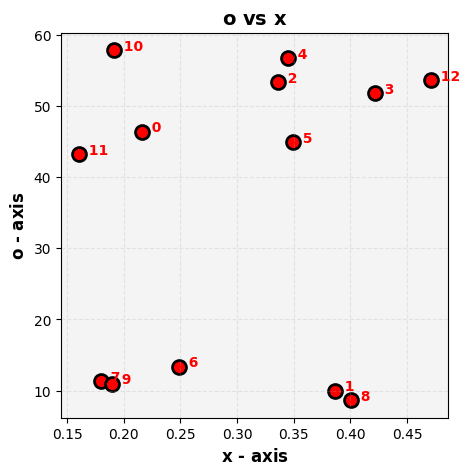

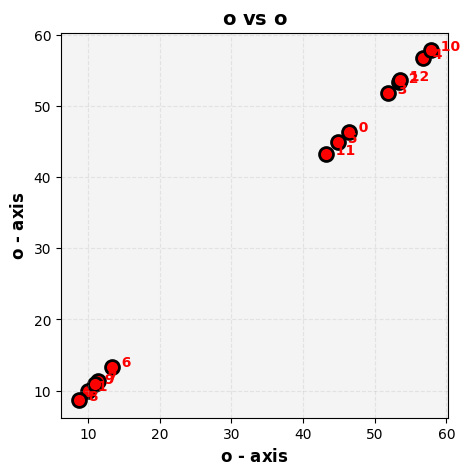

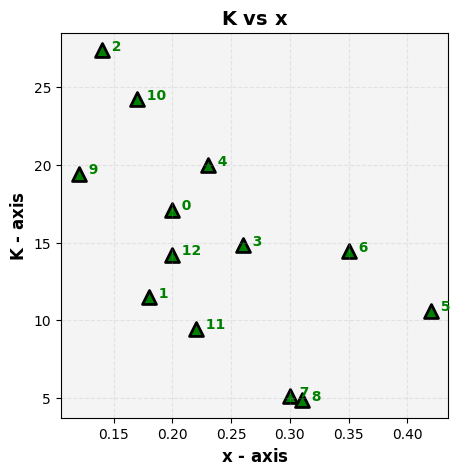

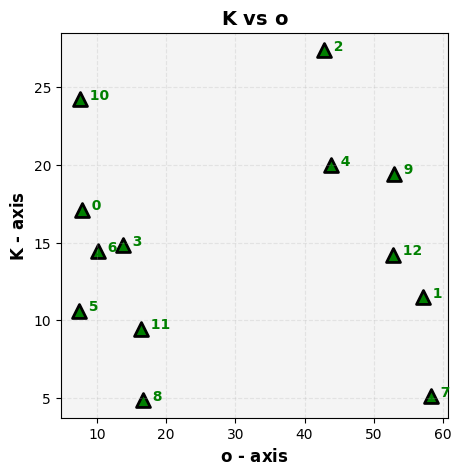

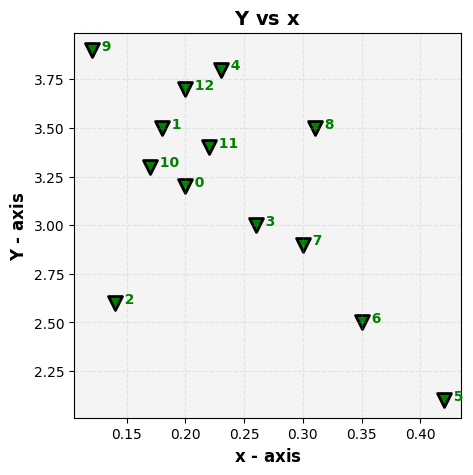

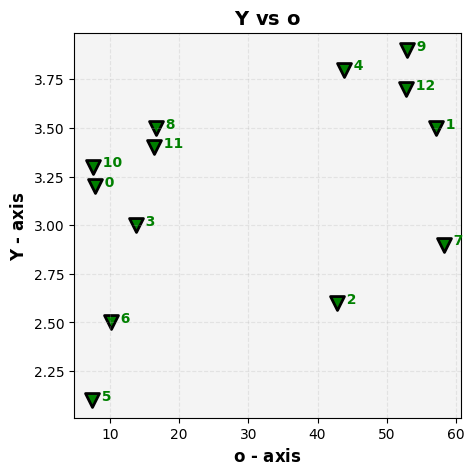

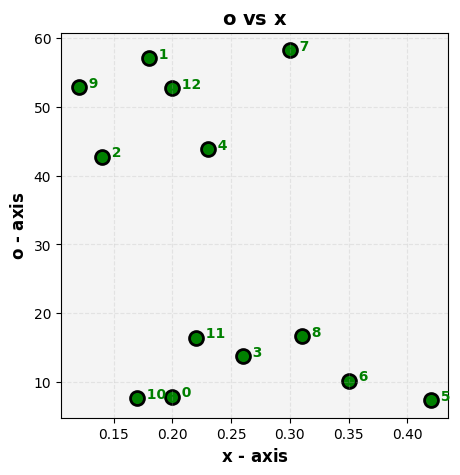

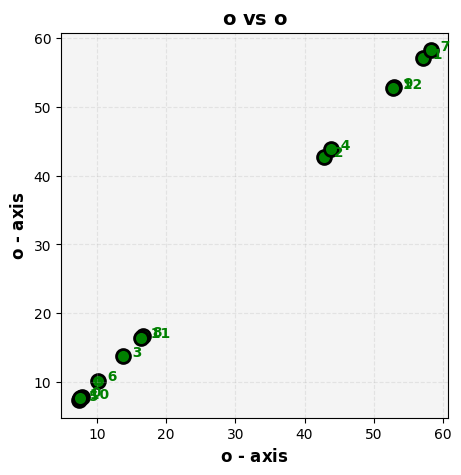

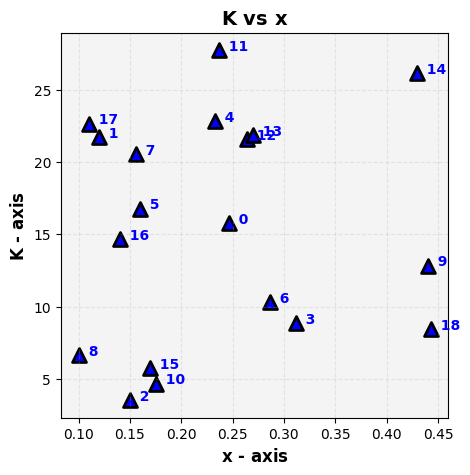

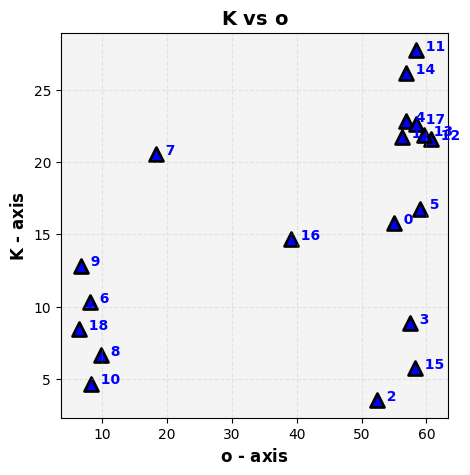

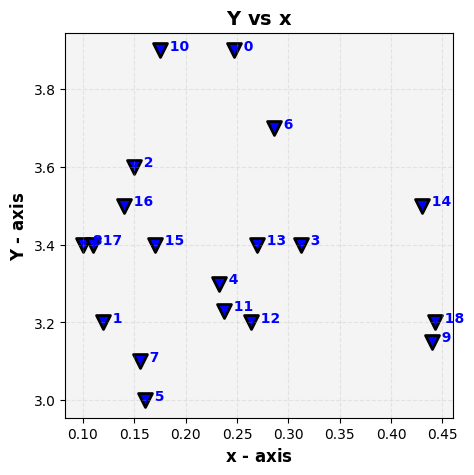

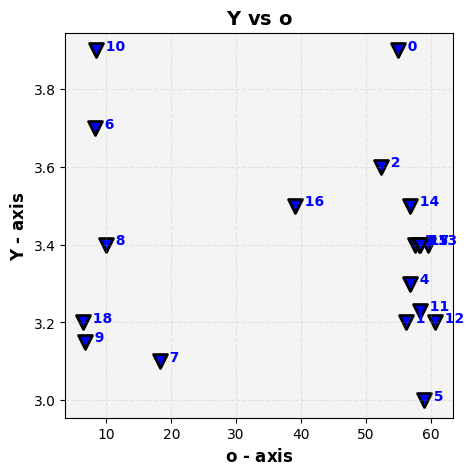

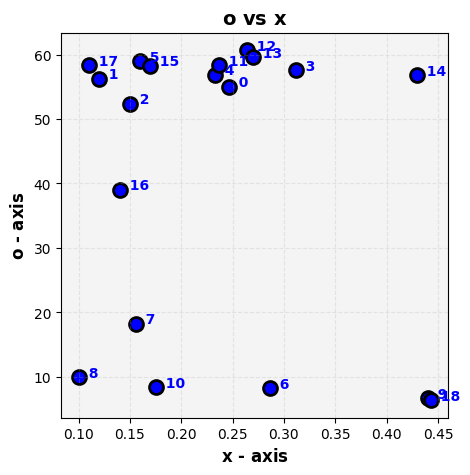

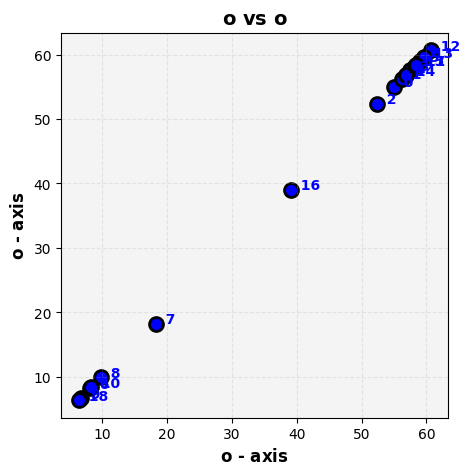

In [9]:
my_2d_plot(data_dict)

# Visaulizing the data
We will consider blue data.

Let us consider point 1 to be unknown. i.e we ae given 5 data points, now we determine using the 5 data points the value at 1. But before that we determine GPR with a particular lengthscale.


In [13]:
xo_train_rgb = [np.hstack([np.array(data_dict['x'][_]).reshape(-1,1),
                             np.array(data_dict['o'][_]).reshape(-1,1)]) for _ in range(3)]
# Defining the scalers
xo_scalers_rgb = [MinMaxScaler() for _ in range(3)]
# Define K and Y scalers.
## Later useful n determining the noise terms
K_scalers_rgb = [MinMaxScaler() for _ in range(3)]
Y_scalers_rgb = [MinMaxScaler() for _ in range(3)]
xo_train_scaled_rgb, K_train_scaled_rgb, Y_train_scaled_rgb  = [[] for _ in range(3)]

# fitting the scalers
for _ in range(3):
    xo_scalers_rgb[_].fit(xo_train_rgb[_])
    xo_train_scaled_rgb.append( xo_scalers_rgb[_].transform(xo_train_rgb[_]) )
    K_scalers_rgb[_].fit(data_dict["K"][_].reshape(-1,1))
    K_train_scaled_rgb.append(K_scalers_rgb[_].transform(data_dict["K"][_].reshape(-1,1)))
    Y_scalers_rgb[_].fit(data_dict["Y"][_].reshape(-1,1))
    Y_train_scaled_rgb.append(Y_scalers_rgb[_].transform(data_dict["Y"][_].reshape(-1,1)))

x_train_scaled_rgb = [xo_train_scaled_rgb[_][:,0] for _ in range(3)]
o_train_scaled_rgb = [xo_train_scaled_rgb[_][:,1] for _ in range(3)]

In [14]:
data_dict_s = {"colors":["Red","Green","Blue"],
             "names":["K","Y","x","o"],
             "shapes":["^","v",1,"o"],
            "K":[K_train_scaled_rgb[_].reshape(1,-1)[0] for _ in range(3)],
            "Y":[Y_train_scaled_rgb[_].reshape(1,-1)[0] for _ in range(3)],
            "x":[x_train_scaled_rgb[_] for _ in range(3)],
            "o":[o_train_scaled_rgb[_] for _ in range(3)]}
            

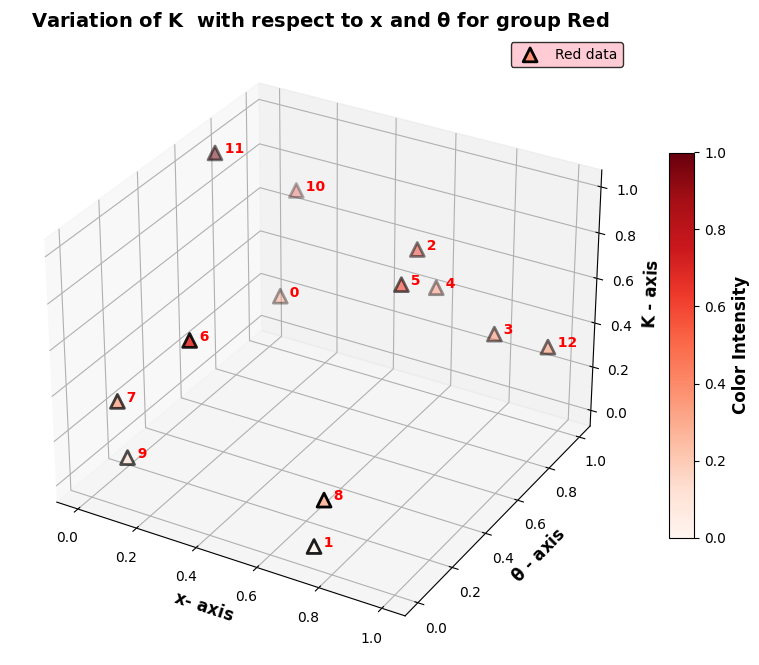

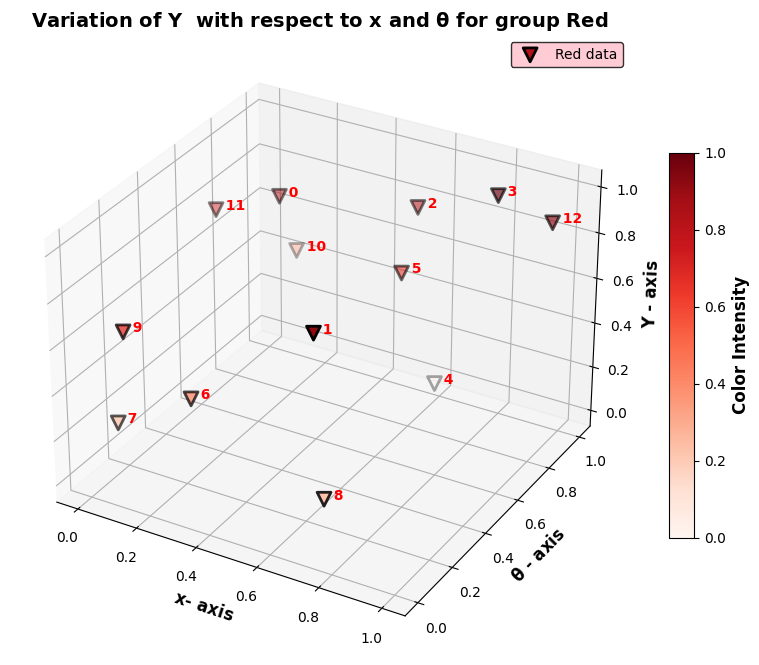

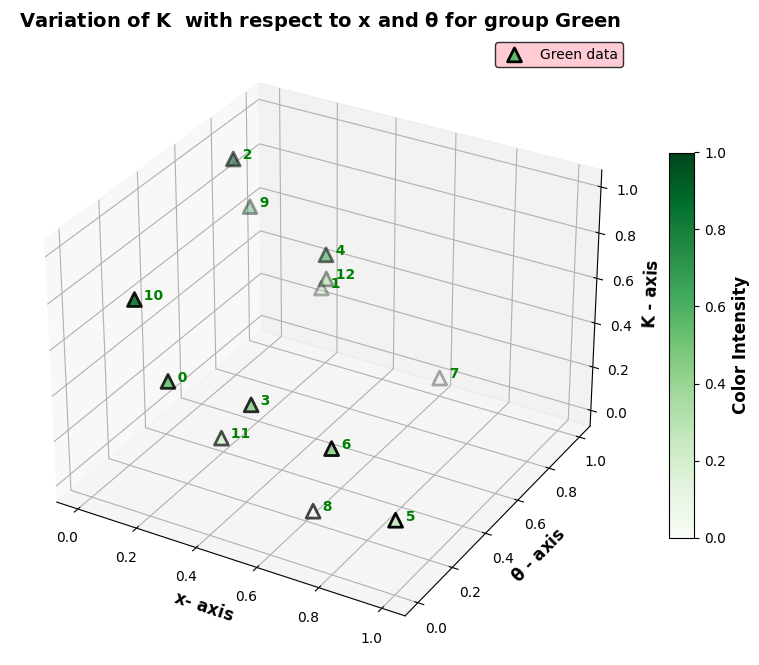

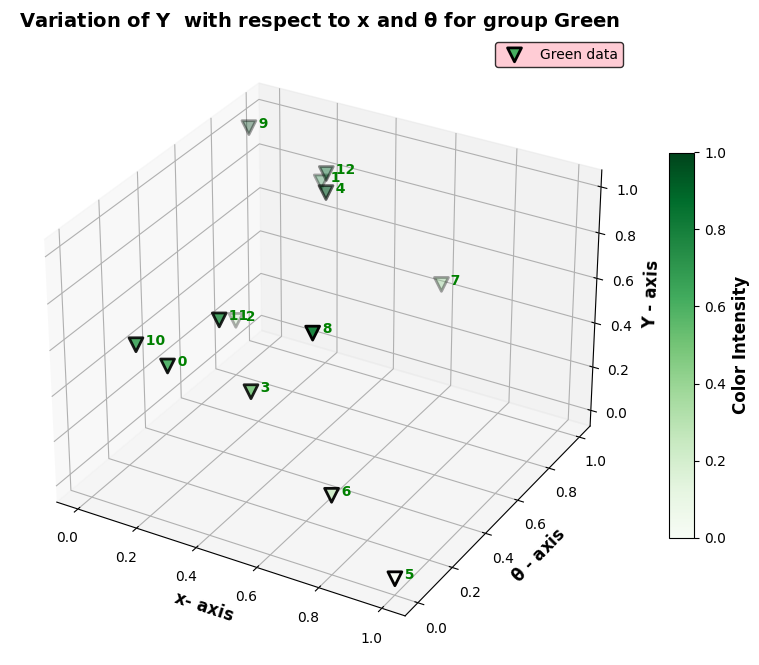

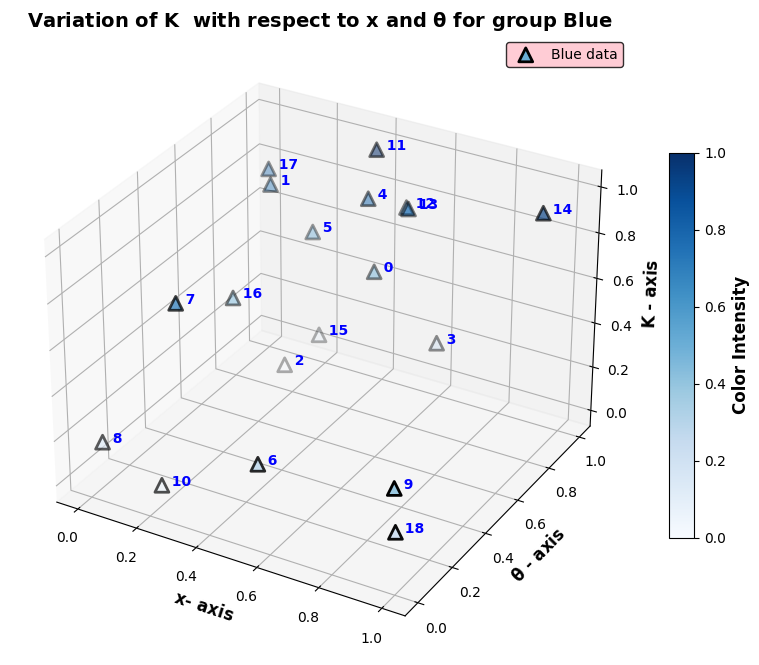

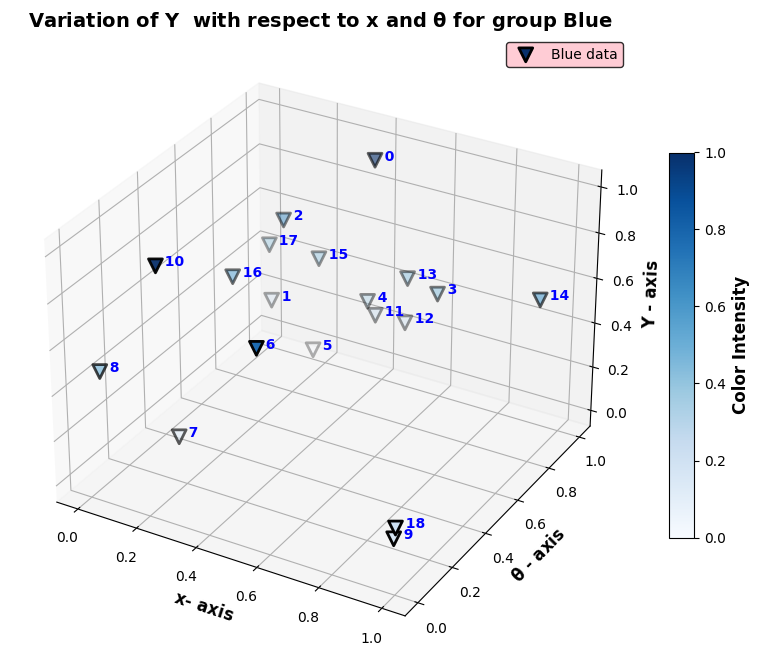

In [15]:
my_3d_plot(data_dict_s)

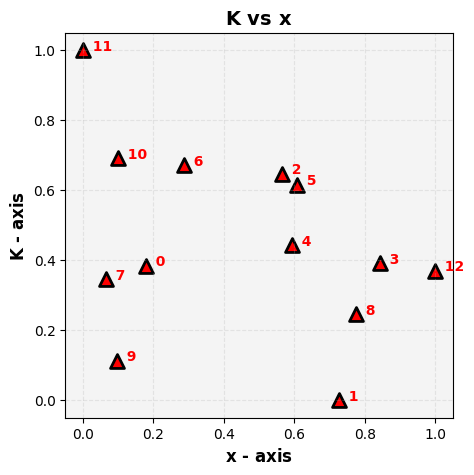

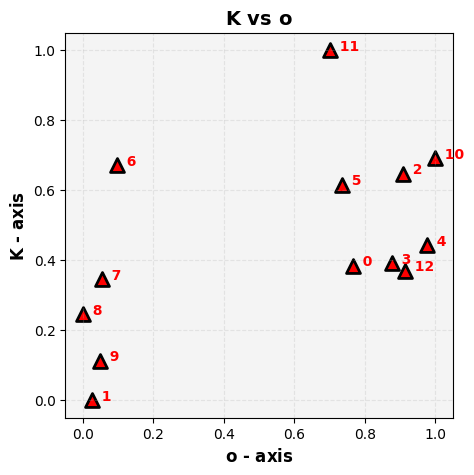

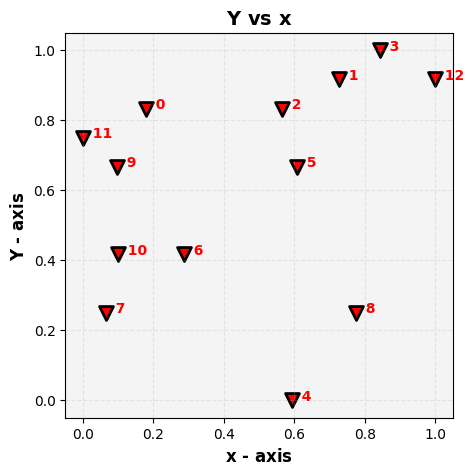

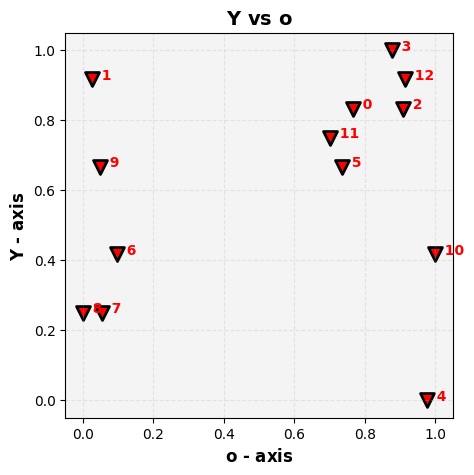

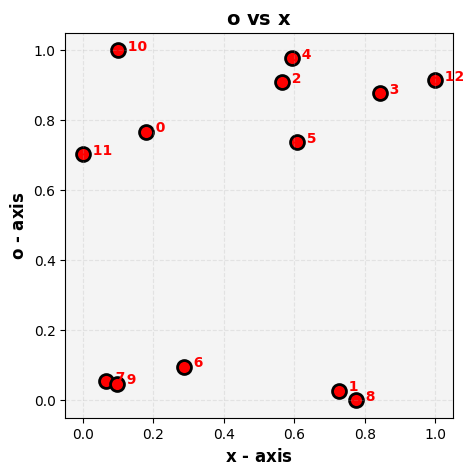

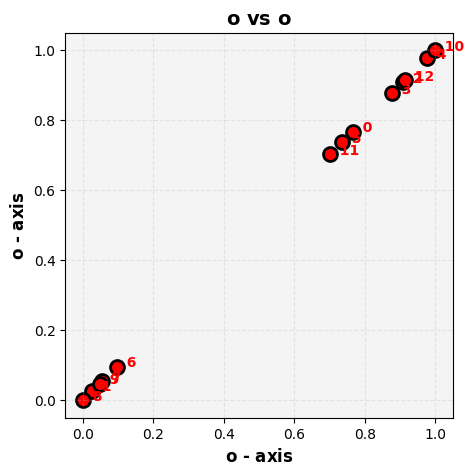

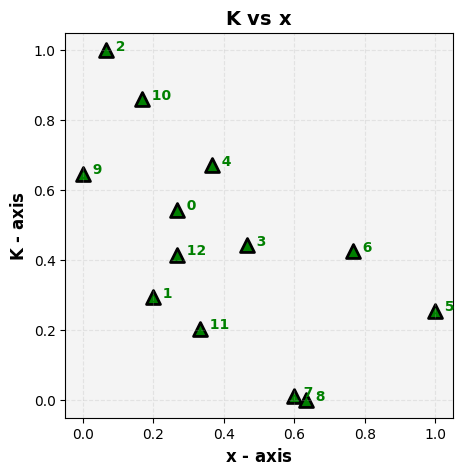

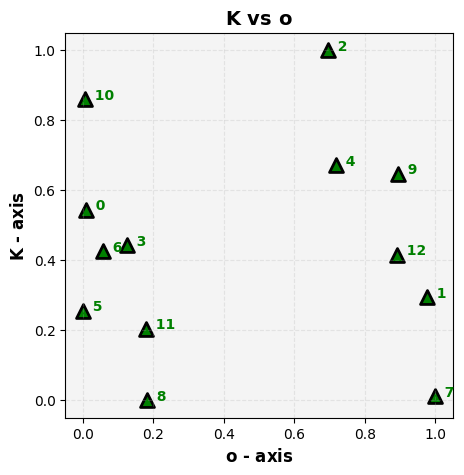

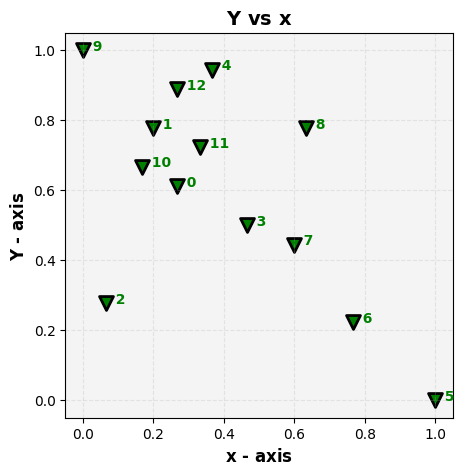

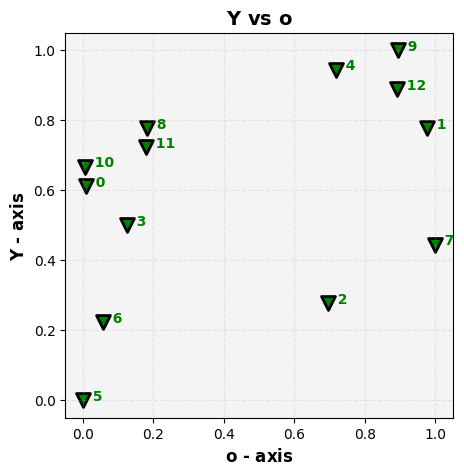

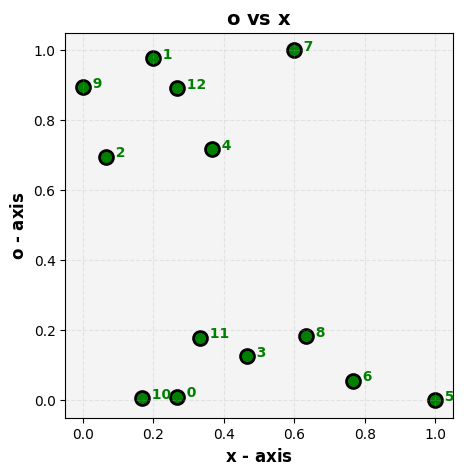

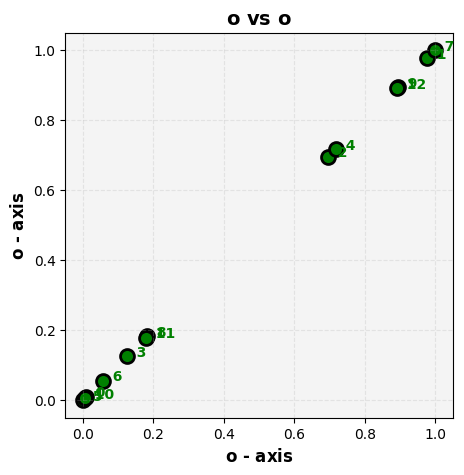

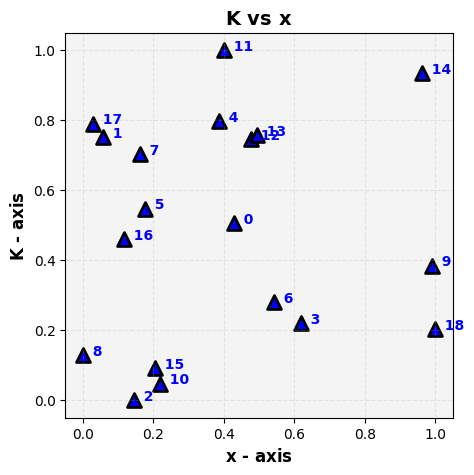

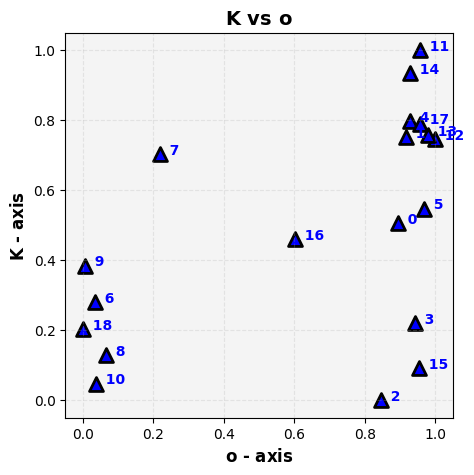

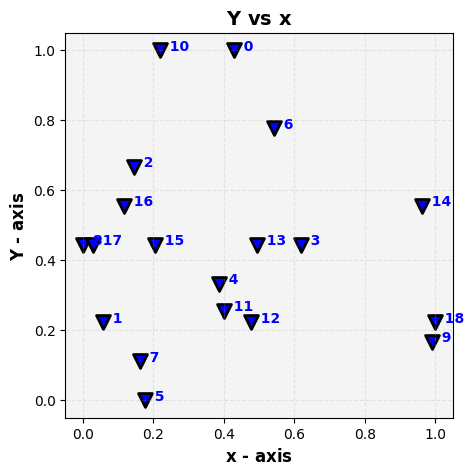

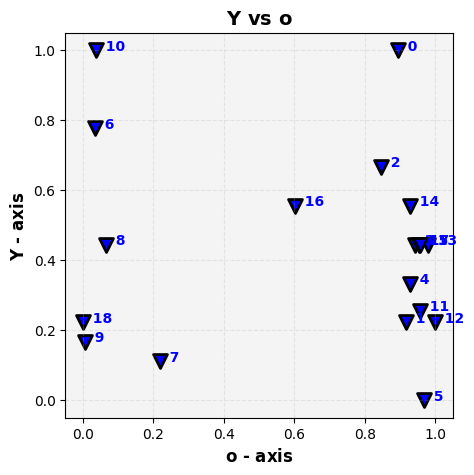

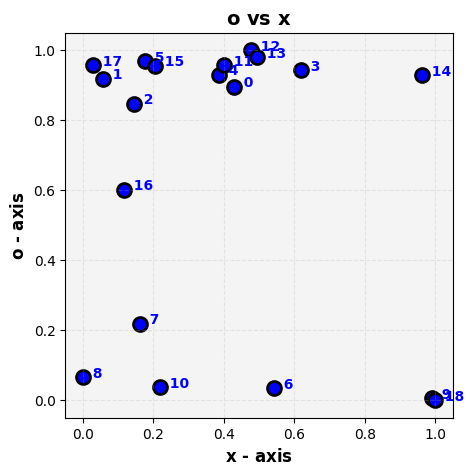

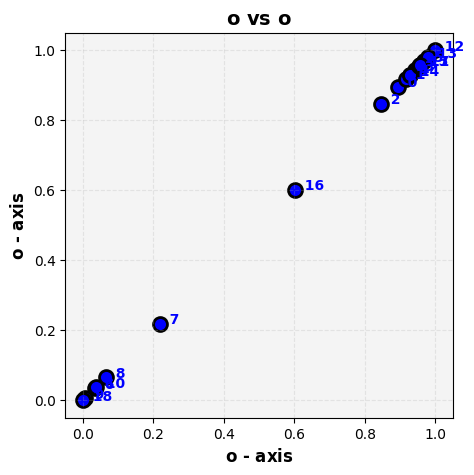

In [16]:
my_2d_plot(data_dict_s)